# EDA with NYC AirBNB

In [5]:
pip install geopandas

  Using cached https://files.pythonhosted.org/packages/5b/0c/e6c99e561b03482220f00443f610ccf4dce9b50f4b1093d735f93c6fc8c6/geopandas-0.6.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9d/f4/0a0ddc6174c4a93679b5f1dd3535e7ef8989828e6d5f86112de681f8c87b/Fiona-1.8.11.tar.gz
    Complete output from command python setup.py egg_info:
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    
    ----------------------------------------
Note: you may need to restart the kernel to use updated packages.


Command "python setup.py egg_info" failed with error code 1 in C:\Users\Khare\AppData\Local\Temp\pip-install-x22oh9bp\fiona\


In [7]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [10]:
#Spatial visualizations
import folium
import folium.plugins
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [8]:
import plotly as plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)

In [12]:
#data ingestion
airbnb = pd.read_csv('new-york-city-airbnb-open-data/AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb.shape

(48895, 16)

In [5]:
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [6]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Understangind, wrangling and cleaning the data

In [7]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

From here we can see that last_review doesnot reall make sense as it is a date that has nothing to do with our case so we drop it. Similarly host_name, name, and id are irrelevant so lets drop these features


In [15]:
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)
#lets see the changes
airbnb.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [16]:
#replacing all Nan values in reviews_per_month with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examining changes
airbnb.reviews_per_month.isnull().sum()

0

Now lets also see how these features are correlated to one another

In [17]:
airbnb.corr().style.background_gradient(cmap='RdYlGn')

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1,0.0202242,0.127055,0.0153091,-0.0173643,-0.140106,0.209783,0.15495,0.203492
latitude,0.0202242,1,0.0847884,0.0339387,0.0248693,-0.0153888,-0.0187577,0.0195174,-0.0109835
longitude,0.127055,0.0847884,1,-0.150019,-0.0627471,0.0590943,0.138516,-0.114713,0.0827307
price,0.0153091,0.0339387,-0.150019,1,0.0427993,-0.0479542,-0.0505641,0.0574717,0.0818288
minimum_nights,-0.0173643,0.0248693,-0.0627471,0.0427993,1,-0.0801161,-0.124905,0.12796,0.144303
number_of_reviews,-0.140106,-0.0153888,0.0590943,-0.0479542,-0.0801161,1,0.589407,-0.0723761,0.172028
reviews_per_month,0.209783,-0.0187577,0.138516,-0.0505641,-0.124905,0.589407,1,-0.0473121,0.163732
calculated_host_listings_count,0.15495,0.0195174,-0.114713,0.0574717,0.12796,-0.0723761,-0.0473121,1,0.225701
availability_365,0.203492,-0.0109835,0.0827307,0.0818288,0.144303,0.172028,0.163732,0.225701,1


From the above heat map we can see that  longitude is negatively correlated related to price and other feature doesnot have such a high negative or a postive correlation 

### Exploratory Data Analysis

In [26]:
airbnb.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

from above columns, we analyze each of them from left to right,also as neighbourhood_group and neighbourhood seems to be really important features lets focus on them and see what insights we can get from them

In [28]:
#checking top host
top_host = airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

so there are host with maximum number of the listings, now lets confirm if this is correct, as we have exiting column called calcuated host listings count

In [29]:
top_host_check = airbnb.calculated_host_listings_count.max()
top_host_check

327

well the two values match, and we are in the right direction now lets visulize the top host in a graph

[]

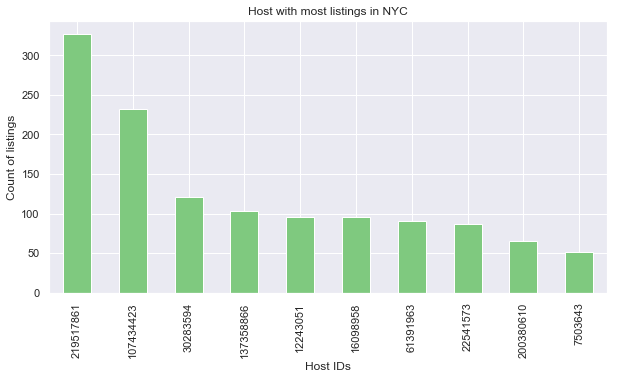

In [58]:
f, ax = plt.subplots(1,1, figsize = (10,5))
top_host.plot(kind='bar' ,colormap='Accent')
ax.set_title("Host with most listings in NYC")
ax.set_xlabel('Host IDs')
ax.set_ylabel('Count of listings')
ax1.set_xticklabels(ax.get_xticklabels(), rotation = 45)

Now lets dive into neighbourhood group, which can be very important feature for us

In [59]:
#examining the neighbourhood_group as this is very important feature
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

So we can see that there are 5 neighbourhood group, now lets see how hotels are located in these 5 groups

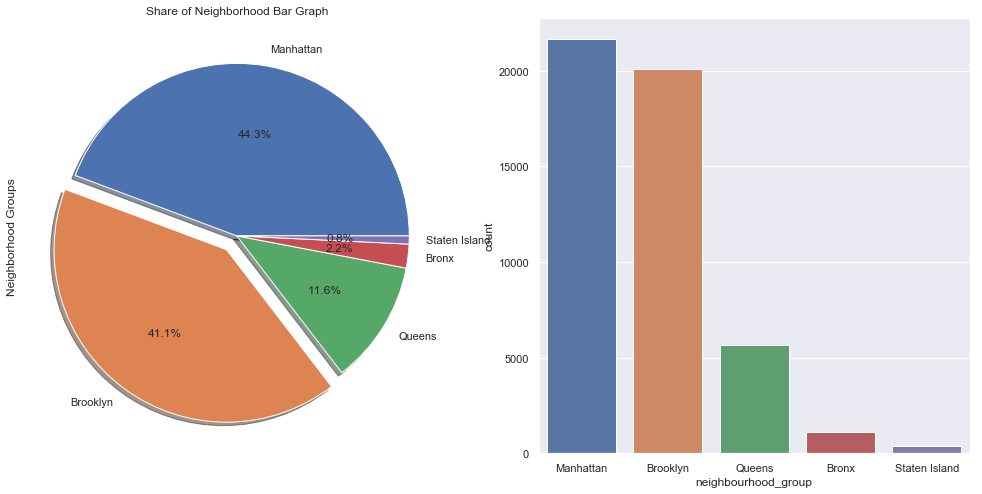

In [62]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (17,8))
airbnb.neighbourhood_group.value_counts().plot.pie(explode=[0,0.1,0,0,0],autopct='%1.1f%%',ax=ax1,shadow=True)
ax1.set_title('Share of Neighborhood Pie Chart')
ax1.set_ylabel('Neighborhood Groups')
sns.countplot('neighbourhood_group', data = airbnb, ax = ax2, order=airbnb['neighbourhood_group'].value_counts().index)
ax1.set_title('Share of Neighborhood Bar Graph')
#x =airbnb.neighbourhood_group.value_counts()
#x.plot(kind = 'bar', color=['r','g','y','b','m'])
plt.show()

From the chat we can see that Manhatten and Brooklyn have the highest Share of hotels and this seems quite realistic due to the fact that Manhatten is one of the most visited place in the world. 

Now, lets find out more about neighbourhoods presented in brooklyn, Manhattan, queens, staten and Bronx. We the price distribution in these groups

In [63]:
sub_1 = airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub_1 = sub_1[['price']]

sub_2 = airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub_2 = sub_2[['price']]

sub_3 = airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub_3 = sub_3[['price']]

sub_4 = airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub_4 = sub_4[['price']]

sub_5 = airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub_5 = sub_5[['price']]

#adding all these items into the list
price_list_ng = [price_sub_1,price_sub_2, price_sub_3, price_sub_4, price_sub_5]

In [64]:
#creating and empty list
price_distribution_list = []
ng_list = ['Brooklyn', 'Manhattan','Queens', 'Staten Island','Bronx']

for x in price_list_ng:
    i = x.describe(percentiles = [.25,.50,.75])
    i = i[3:]
    i.reset_index(inplace = True)
    i.rename(columns = {'index':'Stats'}, inplace = True)
    price_distribution_list.append(i)
    
#changing name of the price column to the area name
price_distribution_list[0].rename(columns={'price':ng_list[0]}, inplace = True)
price_distribution_list[1].rename(columns={'price':ng_list[1]}, inplace = True)
price_distribution_list[2].rename(columns={'price':ng_list[2]}, inplace = True)
price_distribution_list[3].rename(columns={'price':ng_list[3]}, inplace = True)
price_distribution_list[4].rename(columns={'price':ng_list[4]}, inplace = True)

#finalizing our dataframe for final view
price_df = price_distribution_list
price_df = [df.set_index('Stats') for df in price_df]
price_df = price_df[0].join(price_df[1:])
price_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,0.0,13.0
25%,60.0,95.0,50.0,45.0,50.0
50%,90.0,150.0,75.0,65.0,75.0
75%,150.0,220.0,110.0,99.0,110.0
max,10000.0,10000.0,10000.0,2500.0,5000.0


from our stastical table for 5 neighborhood groups we have some extreme values, so lets create a bound for it and viuslaize the entire distribution in violin plot

<function matplotlib.pyplot.show(*args, **kw)>

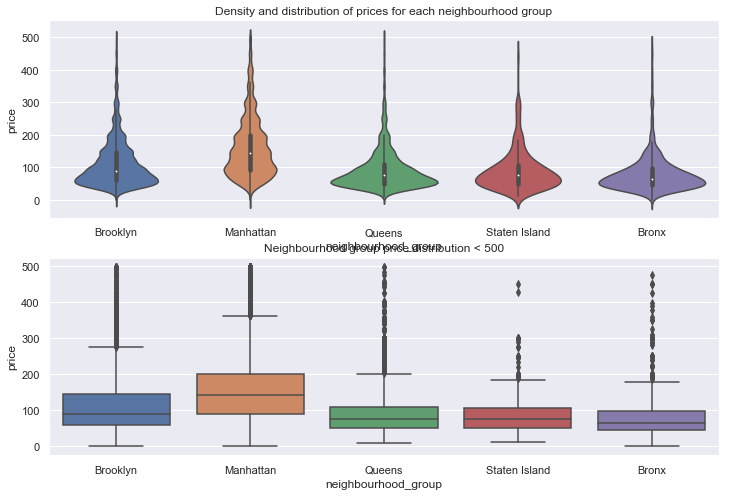

In [76]:
new_df = airbnb[airbnb.price < 500]
f, (ax, ax1) = plt.subplots(2,1, figsize=(12,8))
ax = sns.violinplot(data = new_df, x = 'neighbourhood_group', y = 'price', ax = ax)
ax.set_title('Density and distribution of prices for each neighbourhood group')
ax1 = sns.boxplot(y = 'price', x = 'neighbourhood_group', data = new_df, ax = ax1)
ax1.set_title('Neighbourhood group price distribution < 500')
plt.show

Great !!! with a stastial table and the plots above we can definitly observe a couple of things about distribution of prices for Airbn in NYC boroughs. First we can clearly see that manhattan is has the highest prices range witth average price being 150 followed by Brooklyn. Queens ans staten island has similar distribution, whereas, bronx is the cheapest. The distribution looks toatally realistic considering the fact that Manhattan is one of the most expensive city in the world

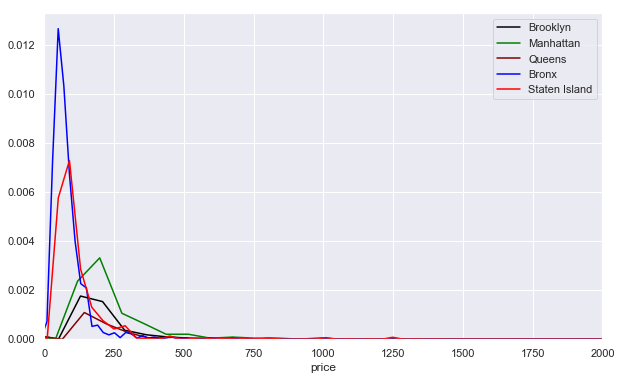

In [77]:
# now lets use distplot to see the price comparision for above ng groups
plt.figure(figsize=(10,6))
sns.distplot(sub_1.price, color='black', hist=False, label='Brooklyn')
sns.distplot(sub_2.price, color='green', hist=False, label='Manhattan')
sns.distplot(sub_3.price, color='maroon', hist=False, label='Queens')
sns.distplot(sub_4.price, color='blue', hist=False, label='Bronx')
sns.distplot(sub_5.price, color='red', hist=False, label='Staten Island')
plt.xlim(0, 2000)
plt.show()

Now, lets move to the next feature neighbourhood and see total number for it

In [78]:
#now lets examine the unique values of neighbourhoodas this column will appear very handy in future analysis
len(airbnb.neighbourhood.unique())

221

So we have altogether 221 neighbourhoods, Now lets get neighbourhoods with most listings

In [79]:
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

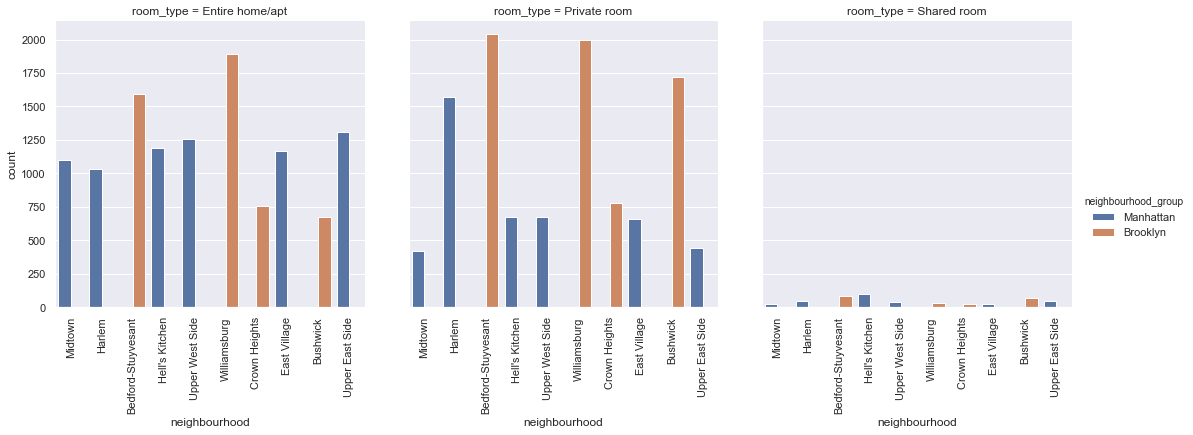

In [85]:
#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

#using catplot to represent multiple interesting attributes
viz3= sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data = sub_7, kind='count')
viz3.set_xticklabels(rotation = 90)

As seen above catplots is one of the best way to compare the various features in higher dimensions as se have 3 subplots here, X and Y axis remains the same which makes us easier to compare. Hue and column are 2 important elements which differentiate the three subplots

From the above we cas see that shared room are barely available and Brroklyn and manhattan has been represented in the graph and this totally make sense as they are most travelled destinations

In [83]:
#using group by to grab two columns neighbourhood and price
df_top_prices_by_neighbourhood = airbnb.groupby('neighbourhood').agg({'price':'mean'}).sort_values('price', ascending = False).reset_index()
df_top_prices_by_neighbourhood.columns

Index(['neighbourhood', 'price'], dtype='object')

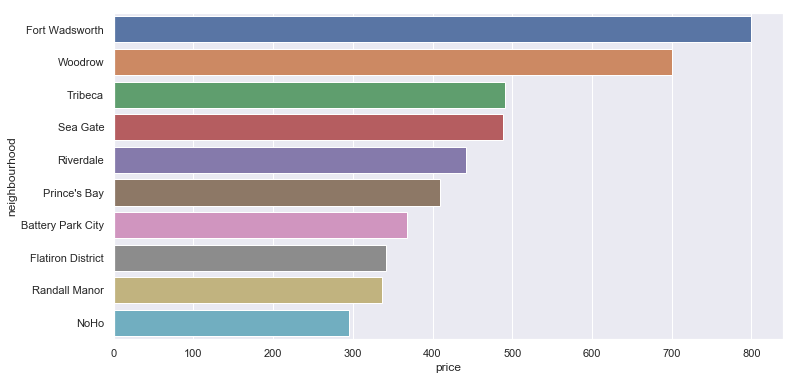

In [84]:
#lets see how expensive these neighbourhoods are
plt.figure(figsize=(12,6))
sns.barplot(y='neighbourhood', x = 'price', data = df_top_prices_by_neighbourhood.head(10))
plt.show()

Fort Wardworth is the most expensive neighborhood followed by Wooddrow

Now lets see the latitude and longitude columns and their contribution to the price of housing, we also check their availability

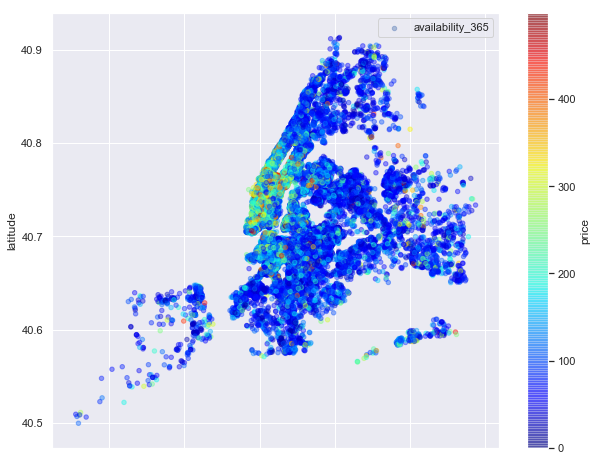

In [89]:
# now lets see what we can do with our latittude and longitude information
ax= new_df.plot(kind ='scatter', x = 'longitude', y = 'latitude', label='availability_365', c = 'price', cmap = plt.get_cmap('jet'), colorbar = 'True', alpha = 0.4, figsize=(10,8))
ax.legend()

Good the scater plot worked just worked jine to output our latitude and latitude points. However it would be better to have a map below for fully immersive heat map in our case.

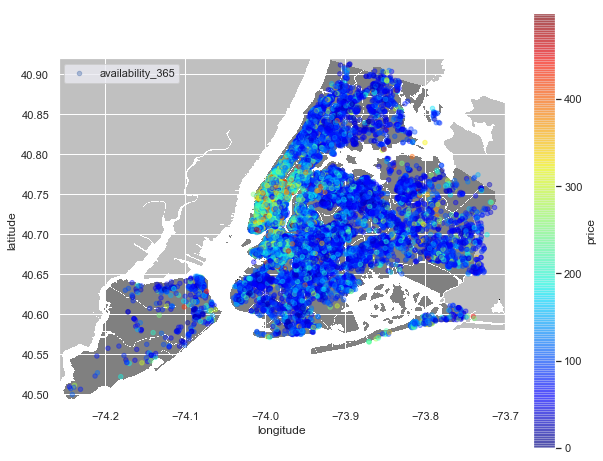

In [90]:
import urllib
plt.figure(figsize = (10,8))
#loading the png image
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img = plt.imread(i)
#scaling the image based on latitude and longitude
plt.imshow(nyc_img, zorder =0, extent=[-74.258,-73.7,40.49,40.92])
ax = plt.gca()
#using scatter plot again
new_df.plot(kind='scatter', x='longitude', y = 'latitude', label='availability_365', c='price', ax = ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha= 0.4, zorder=5)
plt.legend()
plt.show()

### Checking the room details

In [99]:
import plotly.offline as pyo
import plotly.graph_objs as go
roomdf = airbnb.groupby('room_type').size()/airbnb['room_type'].count()*100
labels = roomdf.index
values = roomdf.values

fig = go.Figure(data = [go.Pie(labels = labels, values = values, hole=.3)])
fig.update_layout(
    title="Room Distributions",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

We can see that entire home apartment has highest share followed by private room and least preferred is shared room. Now lets see the room type distribution over the neighbourhood

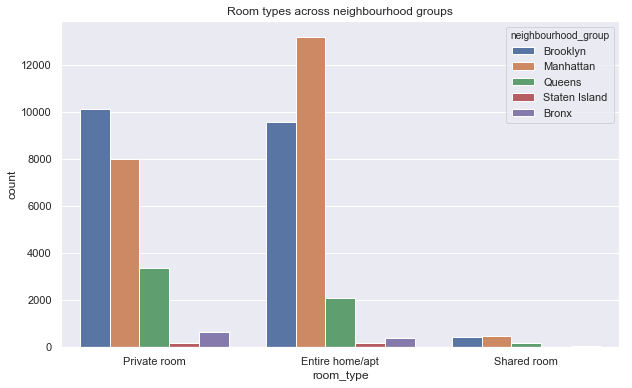

In [102]:
#room types over the neighbourhood groups
plt.figure(figsize=(10,6))
sns.countplot(x='room_type' ,hue = 'neighbourhood_group', data = airbnb)
plt.title("Room types across neighbourhood groups")
plt.show()

Manhattan has the most number of entire home appartment room where as Brooklyn has more private rooms.

Now lets check price per minimum nights for different room types

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



<Figure size 720x432 with 0 Axes>

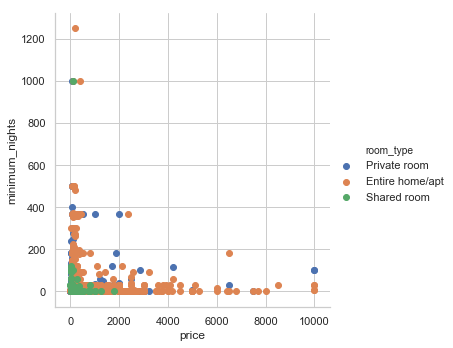

In [106]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.FacetGrid(airbnb, hue='room_type', size = 5).map(plt.scatter, 'price', 'minimum_nights').add_legend()
plt.show()

From the above graph we can see that entire home/appartment are the most expensive where as shared room are the cheapest one and number of nights is also less for this category. whereas, entire home/apt has more nights available being most expensive at the same time

<Figure size 720x432 with 0 Axes>

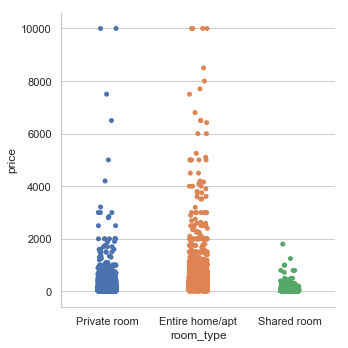

In [107]:
#lets dive deeper into this using catplot for just room type and price realtion\
plt.figure(figsize=(10,6))
sns.catplot(x = 'room_type', y= 'price', data = airbnb)
plt.show()

Asm mentioned above, entire home is most expensive and shared room is the least one. Now lets see neighbourhood with maximum number of groups

Text(0.5, 0, 'rooms')

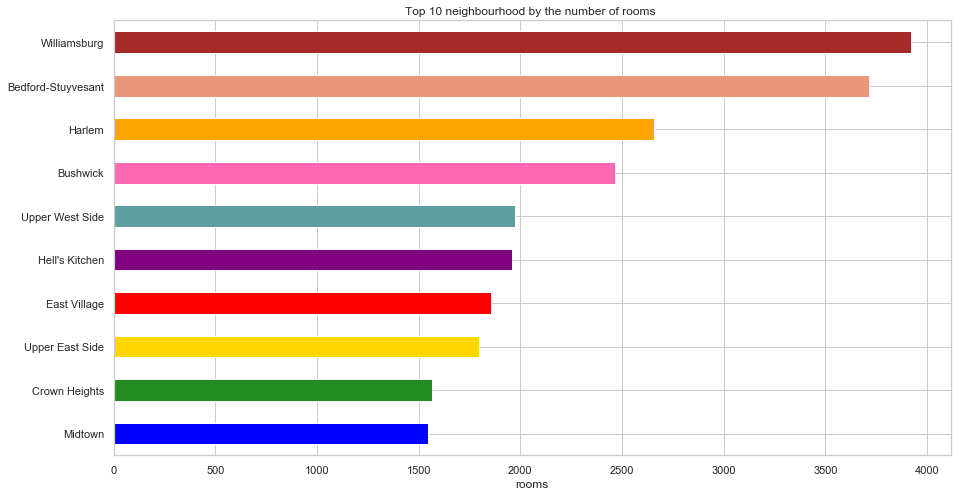

In [112]:
fig, ax1 = plt.subplots(1,1, figsize = (15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
airbnb.neighbourhood.value_counts().sort_values(ascending = False)[:10].sort_values().plot(kind='barh', color = clr,ax =ax1)
ax1.set_title("Top 10 neighbourhood by the number of rooms ")
ax1.set_xlabel('rooms')



### Name Column:
Now lets look at reviews and create a word cloud

<Figure size 720x432 with 0 Axes>

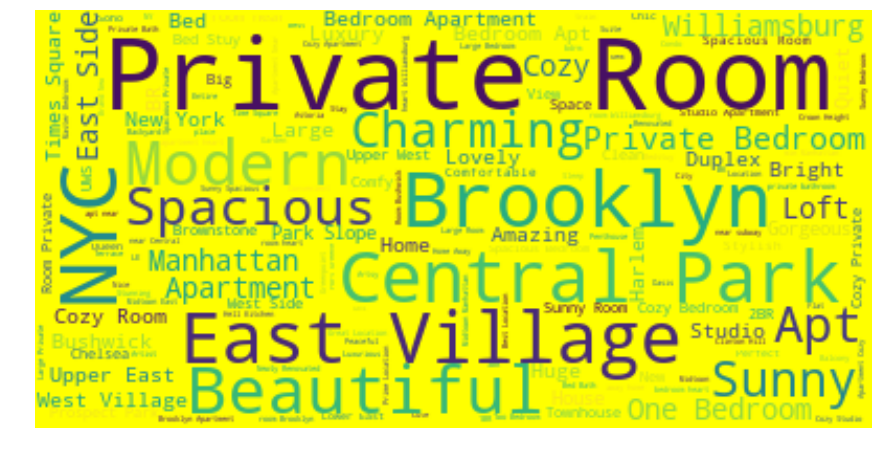

In [114]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(x) for x in airbnb.name)
#creating and generating a word cloud image
wordcloud = WordCloud(max_words=200, background_color='yellow').generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
#diplaying the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the above word cloud, we can see that the words that are most used in the name of the listings are words like private room, charming, beautiful, sunny, spacious etc 

<i>Also lets see the frequency of the most used words below:</i>

In [115]:
names = []
for name in airbnb.name:
    names.append(name)
    
def split_name(name):
    return str(name).split()

#list to keep word counts
word_counts = []
for x in names:
    for word in split_name(x):
        word = word.lower()
        word_counts.append(word)


In [119]:
#using counter to make a count
from collections import Counter
top_25_words = Counter(word_counts).most_common()
top_25_words = top_25_words[:25]
#creating dataframe for better visualization
word_df = pd.DataFrame(top_25_words)
word_df.rename(columns={0:'Words', 1:'Counts'}, inplace=True)

[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

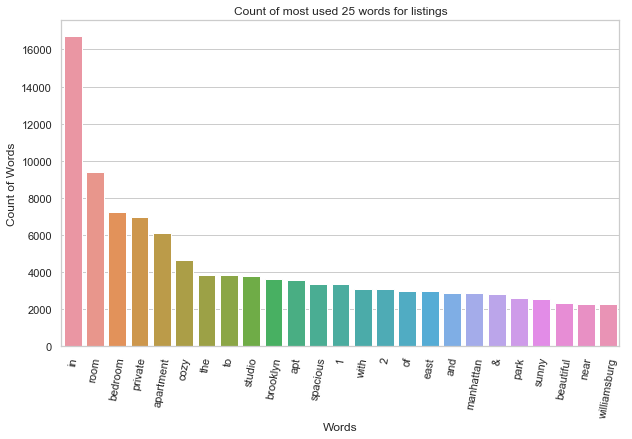

In [121]:
#now visualizing the findings
f, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(x='Words', y='Counts', data = word_df, ax = ax)
ax.set_title("Count of most used 25 words for listings")
ax.set_ylabel("Count of Words")
ax.set_xlabel("Words")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)

So from the above graph we can see that travlers use mostly words like room, spacious, praivate, bedroom, private, studio. Customers seems to use the terms describing space and area where the listing is which is also explained by the word cloud

##### Reviews Column

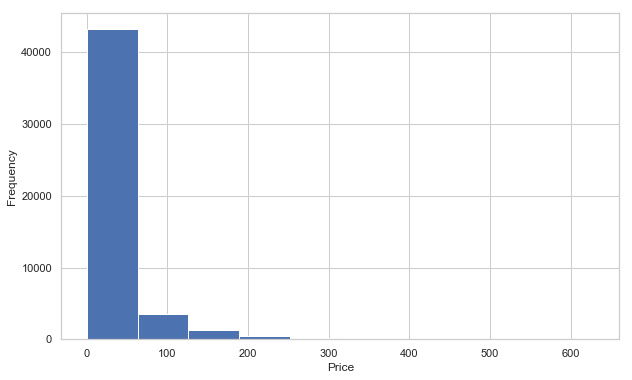

In [128]:
plt.figure(figsize=(10,6))
airbnb.number_of_reviews.plot(kind='hist')
plt.xlabel("Price")
plt.ioff()
plt.show()

From above histo gram we can see that room with price range of 0 - 50 have the maximum reviews

In [130]:
#Displaying room with maximum reviews
#df2 = airbnb.sort_values(by = ['number_of_reviews'], ascending=False).head(1000)
top_reviewed_listings = airbnb.nlargest(10, 'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [40]:
price_avg = top_reviewed_listings.price.mean()
print('Average Price per night: {}'.format(price_avg))

Average Price per night: 65.4


We can see the top 10 most reviewed listings in Airbnb for NYC has price average of $65 with most listings under 50 and 9 out of 10 are private room type, the top review listings has 629 reviews

####  Now lets look at room availability

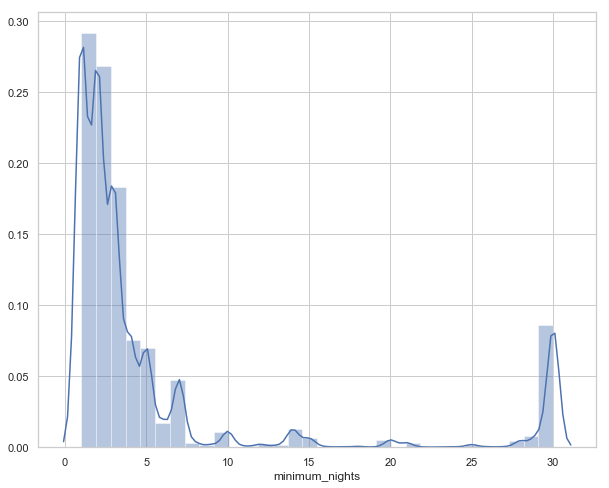

In [133]:
sns.distplot(airbnb[(airbnb['minimum_nights'] <=30) & (airbnb['minimum_nights']>0)]['minimum_nights'], bins=32)
plt.show()

From the above graph it is clear that most booking are made for 1 to 5 days 

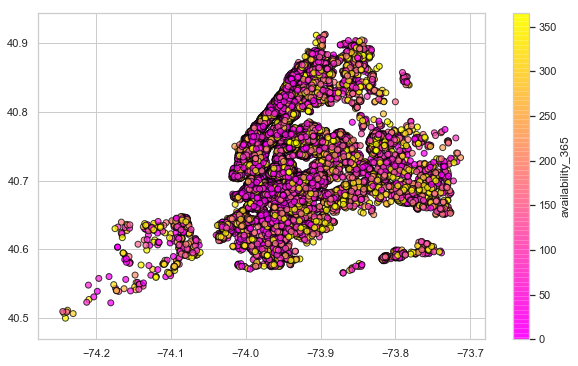

In [134]:
plt.figure(figsize=(10,6))
plt.scatter(airbnb.longitude, airbnb.latitude, c = airbnb.availability_365, cmap='spring', edgecolors='black', linewidths=1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('availability_365')

# Price Prediction with Machine Learning

In [136]:
#name doesnot really matter to us at this point so lets drop it
airbnb.drop('name', axis=1, inplace=True)
airbnb.reviews_per_month = airbnb.reviews_per_month.replace(np.nan, 0)

In [ ]:
#encoding the categorical values
le = preprocessing.LabelEncoder()
le.fit(airbnb['neighbourhood_group'])
airbnb['neighbourhood_group'] = le.transform(airbnb['neighbourhood_group'])

